<a href="https://colab.research.google.com/github/eduardova2892/FinanzasEduPub/blob/main/Colab_Finanzas200825_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

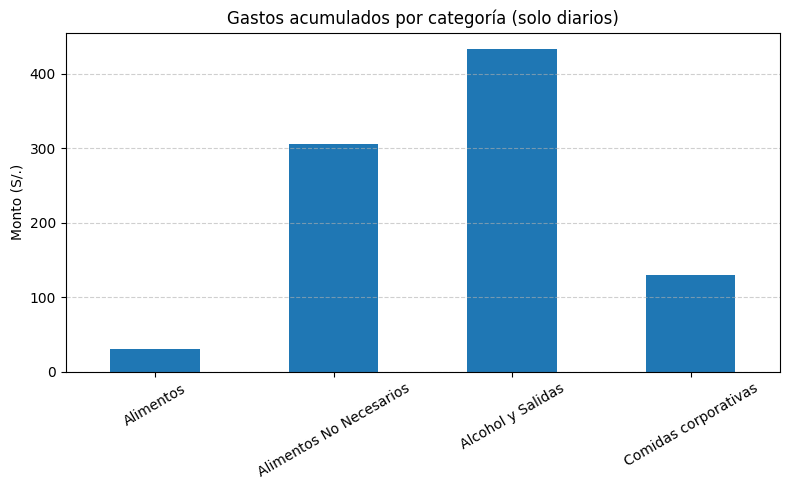

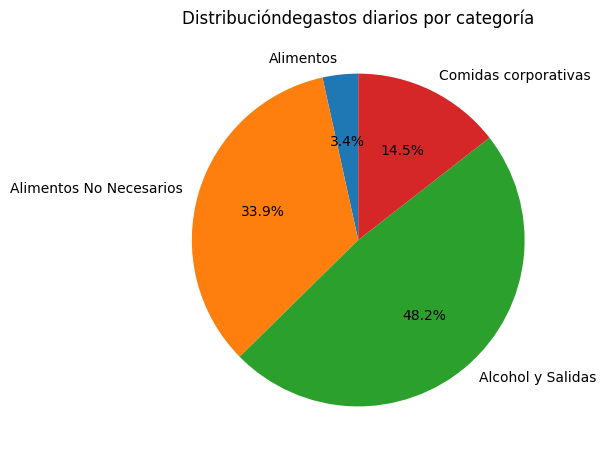

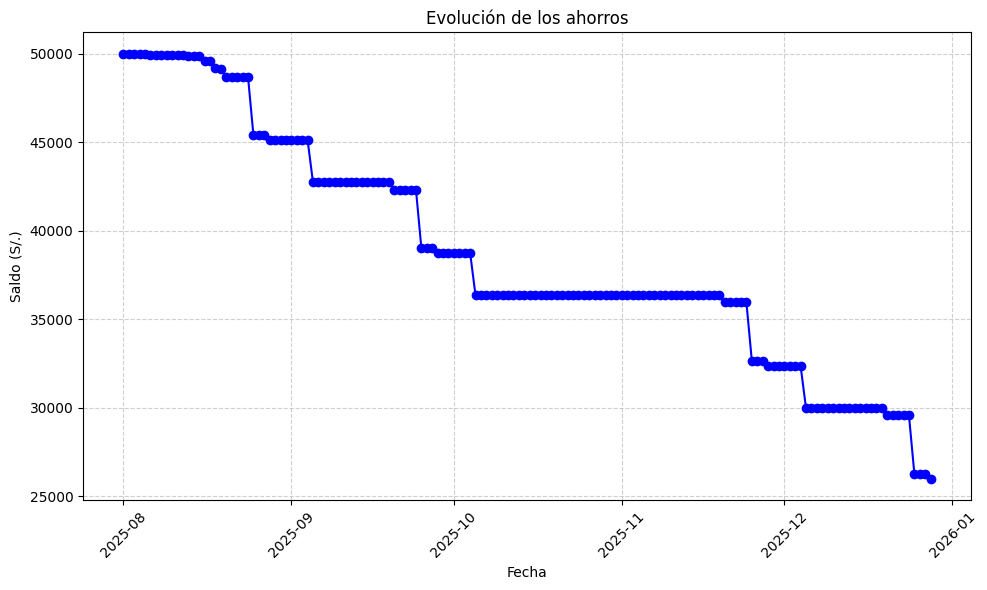


💰 Saldo final al 2025-12-28: S/. 25994.00


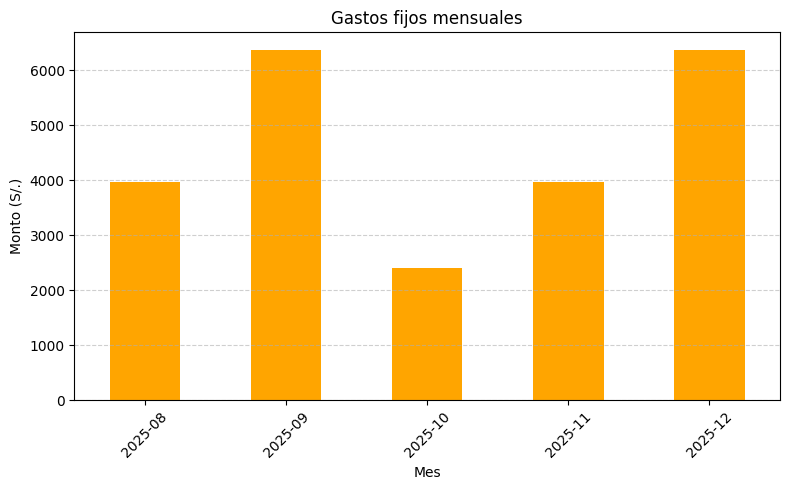

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIGURACIÓN ===
archivo = "gastos.xlsx"
capital_inicial = 50000
fecha_inicio = pd.to_datetime("2025-08-01")

# === LECTURA DE DATOS ===
# Hoja1: Gastos diarios
df_diario = pd.read_excel(archivo, sheet_name="Hoja1")
df_diario["Fecha"] = pd.to_datetime(df_diario["Fecha"])

# Hoja2: Gastos fijos con fecha exacta
df_fijos = pd.read_excel(archivo, sheet_name="Hoja2")
df_fijos["Mes"] = pd.to_datetime(df_fijos["Mes"])

# === FUNCIONES ===

def grafico_barras_diarios():
    """Gráfico de barras con gastos diarios acumulados por categoría"""
    gastos_por_categoria = df_diario.drop(columns=["Fecha"]).sum()

    plt.figure(figsize=(8,5))
    gastos_por_categoria.plot(kind="bar")
    plt.title("Gastos acumulados por categoría (solo diarios)")
    plt.ylabel("Monto (S/.)")
    plt.xticks(rotation=30)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


def grafico_pie_diarios():
    """Gráfico de pie con distribución de gastos diarios"""
    gastos_por_categoria = df_diario.drop(columns=["Fecha"]).sum()

    plt.figure(figsize=(6,6))
    gastos_por_categoria.plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title("Distribucióndegastos diarios por categoría")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


def calcular_evolucion_ahorros():
    """Calcula el saldo acumulado de ahorros considerando gastos diarios y fijos"""
    # 1. Gastos diarios por fecha
    gastos_diarios = df_diario.groupby("Fecha").sum().sum(axis=1)

    # 2. Gastos fijos con fecha exacta
    # Use 'Mes' instead of 'Fecha pago'
    gastos_fijos = df_fijos.groupby("Mes").sum(numeric_only=True).sum(axis=1)

    # 3. Rango de fechas
    fecha_fin = max(gastos_diarios.index.max(), gastos_fijos.index.max())
    fechas = pd.date_range(start=fecha_inicio, end=fecha_fin)

    # 4. Serie de saldo
    saldo = pd.Series(index=fechas, dtype=float)
    saldo.iloc[0] = capital_inicial

    for i in range(1, len(fechas)):
        fecha = fechas[i]
        saldo.iloc[i] = saldo.iloc[i-1]

        # Restar gasto diario
        if fecha in gastos_diarios.index:
            saldo.iloc[i] -= gastos_diarios.loc[fecha]

        # Restar gasto fijo en la fecha exacta
        if fecha in gastos_fijos.index:
            saldo.iloc[i] -= gastos_fijos.loc[fecha]

    return saldo


def grafico_ahorros():
    """Gráfico de evolución de ahorros"""
    saldo = calcular_evolucion_ahorros()

    plt.figure(figsize=(10,6))
    plt.plot(saldo.index, saldo.values, marker="o", color="blue")
    plt.title("Evolución de los ahorros")
    plt.xlabel("Fecha")
    plt.ylabel("Saldo (S/.)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    print(f"\n💰 Saldo final al {saldo.index[-1].date()}: S/. {saldo.iloc[-1]:.2f}")


def grafico_gastos_fijos_mensuales():
    """Gráfico de gastos fijos mensuales"""
    # Use 'Mes' instead of 'Fecha pago'
    df_fijos["Mes"] = df_fijos["Mes"].dt.to_period("M")
    gastos_mensuales = df_fijos.groupby("Mes").sum(numeric_only=True).sum(axis=1)


    plt.figure(figsize=(8,5))
    # The index of 'gastos_mensuales' is Period objects, convert them to strings for plotting
    gastos_mensuales.index = gastos_mensuales.index.astype(str)
    gastos_mensuales.plot(kind="bar", color="orange")
    plt.title("Gastos fijos mensuales")
    plt.ylabel("Monto (S/.)")
    plt.xlabel("Mes")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


# === PROGRAMA PRINCIPAL ===
if __name__ == "__main__":
    grafico_barras_diarios()
    grafico_pie_diarios()
    grafico_ahorros()
    grafico_gastos_fijos_mensuales()